# 選擇GPU


In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

# 載入Library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from PIL import Image
import pathlib
import cv2
import os
import csv
import tensorflow.keras
import random
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns
from contextlib import redirect_stdout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tqdm import tqdm
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import math
from keras import backend as K
import time;
from datetime import datetime
from PIL import Image
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,Activation, MaxPool2D,MaxPooling2D , BatchNormalization,Input,AveragePooling2D , Dropout,Embedding,Lambda,Softmax ,GlobalAveragePooling2D,SeparableConv2D,ZeroPadding2D,DepthwiseConv2D,GlobalMaxPool2D#函式宣告
from tensorflow.keras import Sequential, layers


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# 紀錄檔_TF檔_存檔位址

In [3]:
DateTimeString = datetime.strftime(datetime.now(), '%Y%m%d')+'_'+datetime.strftime(datetime.now(), '%H%M%S')
time_now=time.strftime("%Y-%m-%d %H:%M", time.localtime()) #
save_path = "./TF_Record/"#
save_model = "./tmp/SAVE/model/"#

file_dataside=save_path

if os.path.isdir(file_dataside+time_now):
    print("目錄存在。")

if not os.path.isdir(file_dataside+time_now):
        os.makedirs(file_dataside+time_now)        
Save_file_dataside=save_path+time_now+'/'
save_model_path=save_model+time_now+'/'
re=0 



In [4]:
# ! ls

# 讀入圖片位址

In [5]:
def imageREAD(Paths):
    imagePaths = []
    for dirname, _, filenames in os.walk(Paths):#影像路徑 TR_covid-19'..., 'TR_viral_pneumonia 檔案名稱
    #dirname: /TR_covid-19 /TR_normal /TR_viral_pneumonia
    #filenames:Viral Pneumonia (1) COVID-19 (1)  NORMAL (1)
        for filename in filenames:
        
            if (filename[-3:] == 'JPG'):
                imagePaths.append(os.path.join(dirname, filename))#'.'TR_covid-19/'COVID-19(175)'.png'='.TR_covid-19/COVID-19(175).png'
    return imagePaths

In [6]:
# Paths = './PLAM_FIX/'
Paths = './BMPD/'
# Paths = '../SMPD/'

PLAM_imagePaths = imageREAD(Paths)
# len(PLAM_imagePaths)

# 載入圖片

In [7]:
Data = []
Target = []
img_width = img_height =  resize = img_width = img_height = 300
if(re==0):
    for imagePath in tqdm(PLAM_imagePaths):#把路徑放進去imagePath
        label = imagePath.split(os.path.sep)[-2]#將路徑每個項目拆開變成各自的字串 只取屁股後面的名稱 方便日後作資料轉換
        image = cv2.imread(imagePath)#影像輸入路徑並將像速點讀入
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#改色
        image = cv2.resize(image, (resize ,resize )) /255#~255
#         image = cv2.resize(image, (resize ,resize )) #~255
        Data.append(image)#處理過的圖片像素點
        Target.append(label)#三個資料夾名稱 
else:
    print("跑過了")

re=1

100%|██████████| 1612/1612 [02:26<00:00, 10.99it/s]


In [8]:
print('總共有',len(Data),'張照片')#總共有2905張照片
print('總共有',len(Target),'個項目')


總共有 1612 張照片
總共有 1612 個項目


In [9]:
Target

['036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '036',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '024',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '029',
 '029',
 '029',
 '029',
 '029',


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Labels', ylabel='count'>

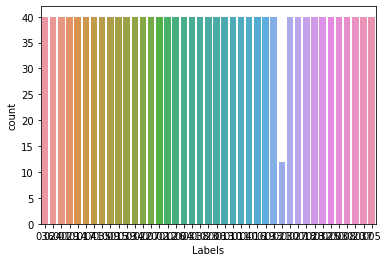

In [10]:
df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])

In [11]:
image.shape

(300, 300, 3)

In [12]:
# encode class values as integers
encoder = LabelEncoder()#資料前處理初始化
encoder.fit(Target)#資料前處理放入
encoded_Target = encoder.transform(Target)#進行資料轉換
# convert integers to dummy variables (i.e. one hot encoded)
encoded_Target = np_utils.to_categorical(encoded_Target)#轉換onehot 1,0,0  0,1,0 0,0,1 



In [13]:
#Train Test Split 我看到這裡5/18
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(encoded_Target), test_size=0.3, random_state=42,stratify=encoded_Target)
#X_train訓練照片 X1_訓練  y_train訓練categorical  y_1訓練categorical
#stratify=encoded_Target 以分層的方式拆分
#Train Test Split
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.6, random_state=42,stratify=y_1)

In [14]:
X_test.shape

(291, 300, 300, 3)

In [15]:
y_train.shape

(1128, 41)

In [16]:
arr=[y_train,y_cv,y_test]
show_data_name=["訓練","驗證","測試"]
for i in range(0,3):
    show_Process_data=np.sum(arr[i], axis=0)
    print(show_data_name[i],arr[i].shape[0],"張")
#     print('武漢肺炎','%.0f'%show_Process_data[0])
#     print("肺炎",'%.0f'%show_Process_data[1])
#     print("正常",'%.0f'%show_Process_data[2])
    print()

訓練 1128 張

驗證 193 張

測試 291 張



In [17]:
if K.image_data_format() == 'channels_first':#channels_first:3,128,128,128） channels_list（128,128,128,3）
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_cv=X_cv.reshape(X_cv.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_cv=X_cv.reshape(X_cv.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)

# 網路建構

# 網路訓練配置

In [18]:
X_train.shape
y_test.shape
batch=4
epoch=350
num_classes=y_test.shape[1]

# MolibNET

In [19]:
# def _make_divisible(ch, divisor=8, min_ch=None):
#     """
#     This function is taken from the original tf repo.
#     It ensures that all layers have a channel number that is divisible by 8
#     It can be seen here:
#     https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/mobilenet.py
#     """
#     if min_ch is None:
#         min_ch = divisor
#     new_ch = max(min_ch, int(ch + divisor / 2) // divisor * divisor)
#     # Make sure that round down does not go down by more than 10%.
#     if new_ch < 0.9 * ch:
#         new_ch += divisor
#     return new_ch

# MolibNetV3

In [20]:
# main_input = Input(shape=X_train.shape[1:], name='main_input')

In [21]:
# def _make_divisible(ch, divisor=8, min_ch=None):
#     """
#     This function is taken from the original tf repo.
#     It ensures that all layers have a channel number that is divisible by 8
#     It can be seen here:
#     https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/mobilenet.py
#     """
#     if min_ch is None:
#         min_ch = divisor
#     new_ch = max(min_ch, int(ch + divisor / 2) // divisor * divisor)
#     # Make sure that round down does not go down by more than 10%.
#     if new_ch < 0.9 * ch:
#         new_ch += divisor
#     return new_ch

In [22]:
# class h_swish(layers.Layer):
#     def __init__(self):
#         super(h_swish, self).__init__()
#         self.relu = layers.ReLU(max_value=6.0)
    
#     def call(self, inputs):
#         x = self.relu(inputs) * inputs

#         return x


In [23]:
# class SqueezeBlock(layers.Layer):
#     def __init__(self, exp_size, divide = 4):
#         super(SqueezeBlock, self).__init__()
#         self.linear = Sequential([
#             layers.GlobalAveragePooling2D(),
#             layers.Dense(exp_size // divide),
#             layers.ReLU(max_value=6.0),
#             layers.Dense(exp_size),
#         ])
#         self.h_sigmoid = tf.keras.activations.hard_sigmoid

#     def call(self, inputs):
#         x = self.linear(inputs)
#         x = self.h_sigmoid(x)
#         x = tf.reshape(x, (tf.shape(x)[0], 1, 1, tf.shape(x)[-1]))
#         out = tf.math.multiply(inputs, x)

#         return out

In [24]:
# class ConvBN(layers.Layer):
#     def __init__(self, out_channel, kernel_size, stride, activation, padding):
#         super(ConvBN, self).__init__()
#         self.conv = layers.Conv2D(out_channel, kernel_size=kernel_size, strides=stride, padding=padding)
#         self.BN = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name='BatchNorm')
#         self.flag = activation
#         self.relu = layers.ReLU()
#         self.h_swish = h_swish()

#     def call(self, inputs):
#         x = self.conv(inputs)
#         x = self.BN(x)
#         if self.flag == 'relu':
#             out = self.relu(x)
#         elif self.flag == 'h_swish':
#             out = self.h_swish(x)

#         return out

In [25]:
# class Bneck(layers.Layer):
#     def __init__(self, in_channel, out_channel, kernel_size, stride, SE, NL, exp_size, dropout_rate = 1.0):
#         super(Bneck, self).__init__()
#         self.out_channel= out_channel
#         self.SE = SE
#         self.dropout_rate = dropout_rate
#         self.NL = NL

#         self.shortcut = (stride == 1 and in_channel == out_channel)

#         if self.NL == 'RE':
#             activation = 'relu'
#         elif NL == 'HS':
#             activation = 'h_swish'
        
#         self.ConvBN_1 = ConvBN(out_channel=exp_size, kernel_size=1, stride=1, padding='valid', activation=activation)

#         self.DWBN = Sequential([
#             layers.DepthwiseConv2D(kernel_size=kernel_size, strides=stride, padding='same', use_bias=False),
#             layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name='BatchNorm')
#         ])

#         if self.SE:
#             self.squeeze_block = SqueezeBlock(exp_size)
        
#         self.ConvBN_2 = ConvBN(out_channel=out_channel, kernel_size=1, stride=1, padding='valid', activation=activation)

#     def call(self, inputs):
#         x = self.ConvBN_1(inputs)
#         x = self.DWBN(x)

#         if self.SE:
#             x = self.squeeze_block(x)
            
#         x = self.ConvBN_2(x)

#         if self.shortcut:
#             return inputs + x
#         else:
#             return x



In [26]:
# def MV3(input_image, alpha = 1.0):
#     input_channel = _make_divisible(16*alpha)
#     last_channel = _make_divisible(1280*alpha)


#     bneck_setting = [
#         [16, 64, 2, False, 'RE', 1],
#         [64, 64, 2, False, 'HS', 2],
#         [72, 128, 2, False, 'RE', 1],
#         [72, 128, 2, True, 'HS', 2],
#         [120, 256, 2, True, 'RE', 1],
#         [120, 256, 2, True, 'HS', 2],
#         [240, 512, 2, False, 'RE', 1],
#         [200, 512, 2, False, 'HS', 2],

#     ]



#     x = ConvBN(out_channel=input_channel, kernel_size=1, stride=1, padding='valid', activation='h_swish')(input_image)

#     for exp_size, out_channel, kernel_size, SE, NL, stride in bneck_setting:
#         exp_size = _make_divisible(exp_size*alpha)
#         out_channel = _make_divisible(out_channel*alpha)
#         x = Bneck(x.shape[-1], out_channel, kernel_size, stride, SE, NL, exp_size)(x)
# #     x = ConvBN(out_channel=input_channel, kernel_size=2, stride=1, padding='same', activation='h_swish')(x)

#     last_out = _make_divisible(184*alpha)
# #     x = ConvBN(512, kernel_size=2, stride=2, activation='h_swish', padding='valid')(x)
# # #     x = keras.layers.DepthwiseConv2D(kernel_size=(2,2),padding='valid',strides=2)(x)
#     x = ConvBN(512, kernel_size=1, stride=1, activation='h_swish', padding='valid')(x)

#     x = layers.GlobalAveragePooling2D()(x)
#     x = layers.Dense(last_channel)(x)
#     x = h_swish()(x)
# #     x = layers.Dense(41)(x)

# #     model = Model(inputs=input_image, outputs=output)
#     return x
# # balala

In [27]:
# x = MV3(main_input)

# y = Dense(num_classes, activation='softmax')(x) 

# main_output = y

In [28]:
# model = Model(inputs=[main_input], outputs=[main_output])
# base_model = tf.keras.applications.MobileNetV3Small(
# base_model = tf.keras.applications.nasnet.NASNetMobile(
# base_model = tf.keras.applications.MobileNetV3Large(
# 
base_model = tf.keras.applications.mobilenet.MobileNet(
# base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
# base_model = tf.keras.applications.resnet50.ResNet50 (    
    
    input_shape=(300,300,3), 
#     alpha=1.0,
#     minimalistic=False, 
    include_top=False,
#     weights='imagenet',
    weights=None,
    input_tensor=None, 
    classes=num_classes,
    pooling=None,
#     dropout_rate=0.2,
#     classifier_activation='softmax'
)
x = base_model.output
x = GlobalAveragePooling2D()(x)

# 添加一个全连接层
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# 添加一个分类器，假设我们有200个类
predictions = Dense(num_classes, activation='softmax')(x)

# 构建我们需要训练的完整模型
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()
# plot_model(model, to_file='model.png')



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 150, 150, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 150, 150, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 150, 150, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 150, 150, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 150, 150, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 150, 150, 32)      0     

In [29]:
# # model = Model(inputs=[main_input], outputs=[main_output])
# # base_model = tf.keras.applications.MobileNetV3Small(
# base_model = tf.keras.applications.MobileNetV3Large(

# # base_model = tf.keras.applications.mobilenet.MobileNet(
# # base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    
#     input_shape=(300,300,3), 
# #     alpha=1.0,
# #     minimalistic=False, 
#     include_top=False,
# #     weights='imagenet',
#     weights=None,
#     input_tensor=None, 
#     classes=num_classes,
#     pooling=None,
# #     dropout_rate=0.2,
# #     classifier_activation='softmax'
# )
# x = base_model.output
# x = GlobalAveragePooling2D()(x)

# # 添加一个全连接层
# x = Dense(1024, activation='relu')(x)
# x = Dense(512, activation='relu')(x)

# # 添加一个分类器，假设我们有200个类
# predictions = Dense(num_classes, activation='softmax')(x)

# # 构建我们需要训练的完整模型
# model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()
# plot_model(model, to_file='model.png')



In [30]:
# with open(Save_file_dataside+'modelsummary.txt', 'w') as f:
#     with redirect_stdout(f):
#         model.summary()

In [31]:
# logdir=Save_file_dataside + datetime.now().strftime("%Y%-m-%d_%H:%M:%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# #print(logdir)

In [32]:
# # keras.backend.get_session().run(tf.global_variables_initializer())
# model.save('./SAVE/PLAM_CNN_KM3L_CHAN_FIX_PW_AR.h5')  # creates a HDF5 file 'my_model.h5'


# CHAOS ANNEAL

In [33]:
##### from keras import backend as K
from ipywidgets import interactive, fixed, FloatSlider, IntSlider
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns
%matplotlib inline
def CHAL_lr_schedule(epoch):
    delta=0.30
    lam=2500
    D=0
    I0=0.95
    m=365
    b=121
#     b = 20
    x=0.2
    
    T0=0.015
    u0=0.75
    v0=0.001
    tv0=0
    assert lam != 0
    lam = 1 / lam
    T=[T0] + [0] * m #2.73
    u = [u0] + [0] * m 
    v=[v0] + [0] * m 
    tv=[tv0] + [0] * m     
    for k in range(1, m):
        T[k] = ((1 / (b + 1)) * (b + (math.tanh(x) ** k))* T[k-1])
    for k in range(0, m):
        u[k+1] = (1/(1+np.exp(-v[k]/lam)))
        v[k+1] = (delta*math.sin(math.pi*v[k])+D-T[k]*(u[k]-I0))
        tv[k] = math.sqrt((T[k]-v[k])**2)
#     print('Learning rate: ', tv[epoch])
#     f = plt.figure(figsize=(13,5))
#     sns.set_style("darkgrid")
#     plt.plot(tv,'.' )
#     plt.plot(tv,'.' )
    return tv[epoch]

# a = CHAL_lr_schedule(40)

# ANNEAL

In [34]:
# ##### from keras import backend as K
# from ipywidgets import interactive, fixed, FloatSlider, IntSlider
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# import random
# import seaborn as sns
# %matplotlib inline
# def AL_lr_schedule(epoch):
#     delta=0.30
#     lam=2500
#     D=0
#     I0=0.95
#     m=350
#     b=85
# #     b = 20
#     x=0.2
    
#     T0=0.015
#     u0=0.75
#     v0=0.001
#     tv0=0
#     assert lam != 0
#     lam = 1 / lam
#     T=[T0] + [0] * m #2.73
#     u = [u0] + [0] * m 
#     v=[v0] + [0] * m 
#     tv=[tv0] + [0] * m     
#     for k in range(1, m):
#         T[k] = ((1 / (b + 1)) * (b + (math.tanh(x) ** k))* T[k-1])
#     for k in range(0, m):
#         u[k+1] = (1/(1+np.exp(-v[k]/lam)))
#         v[k+1] = (delta*math.sin(math.pi*v[k])+D-T[k]*(u[k]-I0))
#         tv[k] = math.sqrt((T[k]-v[k])**2)
# #     print('Learning rate: ', tv[epoch])
# #     f = plt.figure(figsize=(13,5))
# #     sns.set_style("darkgrid")
# #     plt.plot(T,'.' )
# #     plt.plot(tv,'.' )
#     return T[epoch]

# # a = AL_lr_schedule(40)

# Exponential

In [35]:

# # Exponential Decay with learning rate
#    #（自動計算)的衰減係數
# def exp_decay_lr(epoch):
#     min_lr    = 1e-5                                      # 學習率的下限
#     init_lr   = 0.01                                       # 初始學習率
#     lr_decay  = -np.log(min_lr/init_lr)/(epoch-1)  
#     decays2 = np.arange(epoch+0.0)
#     for i in range(len(decays2)): 
#         if i==0:
#             decays2[i] = math.exp(-lr_decay*i)*init_lr
#         else:
#             decays2[i] = math.exp(-lr_decay*i)*init_lr*(1+decays2[i-1])
#         print(decays2[i])
#     return decays2[epoch-1]
# # D2 = exp_decay_lr(Run_number)

# # Callbacks
# # patience0 = Run_number  # To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

# Exponential Keras

In [36]:
# initial_learning_rate = 0.1
# lr_schedule_OK = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=4,
#     decay_rate=0.09,
#     staircase=True)

In [37]:
# from ipywidgets import interactive, fixed, FloatSlider, IntSlider
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# import random
# import seaborn as sns
# %matplotlib inline

# def CHAL_lr_P_schedule(epoch):

#     delta=0.30
#     lam=2500 
#     D=0
#     I0=0.95
#     m=300
#     b=30
#     x=0.2
#     s = 3
#     s1 = s-1
#     m1 = m / s 
#     Tmax = 0.02
#     T0=Tmax 
#     Tb = T0 / s
#     u0=0.75
#     v0=0.001
#     tv0=0
#     k1 = 1
#     assert lam != 0
#     lam = 1 / lam
#     T=[T0] + [0] * m #2.73
#     u = [u0] + [0] * m 
#     v=[v0] + [0] * m 
#     tv=[tv0] + [0] * m  
    
    
#     for k in range(1, m):
        
# #         T[k] = ((1 / (b + 1)) * (b + (math.tanh(x) ** k1))* T[k1-1])
#         T[k] = ((1 / (b + 1)) * (b + (math.tanh(x) ** k1))* Tb)
#         Tb = T[k]

#         if ( (k % (m/s)) == 0 ) :
#             Tb = T0 / s
#             s1 -=1
# #             print(s1)
#             k1 = 1
#             T[k] = (T[k] )+(Tmax/s)
# #             print(k1)
# #         print("Tk = " , T[k])
#         T[k] = (T[k] )+(Tmax/s) *s1
# #         T0 = T[k]
# #         print("Tkm = " ,(Tmax/s) *s1)
# #         print("Tka = " , T[k])
#         k1 +=1

# #             T[k] = (T[k] / s)*m1 
#     for k in range(0, m):
#         u[k+1] = (1/(1+np.exp(-v[k]/lam)))
#         v[k+1] = (delta*math.sin(math.pi*v[k])+D-T[k]*(u[k]-I0))
#         tv[k] = math.sqrt((T[k]-v[k])**2)        
                                         
# #     f = plt.figure(figsize=(13,5))
# #     sns.set_style("darkgrid")
# #     plt.plot(T,'.' )
# #     plt.plot(tv,'.' )
#     return tv[k]
# # a = CHAL_lr_P_schedule(300)

In [38]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
top1_acc = tf.keras.metrics.TopKCategoricalAccuracy(
    k=1, name='top_1_categorical_accuracy', dtype=None
)
# top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(
#     k=3, name='top_3_categorical_accuracy', dtype=None
# )
top5_acc = tf.keras.metrics.TopKCategoricalAccuracy(
    k=5, name='top_5_categorical_accuracy', dtype=None
)

In [39]:
# callback_num=2
# sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.01, nesterov=False)
# opt = tf.keras.optimizers.RMSprop(lr=0.01, decay=1e-6)
# compileopt  = "adam" 
# compileopt  = opt

#Model Compile

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    get_f1,
    top5_acc,
#     top3_acc,
    top1_acc
]
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.compile(loss='categorical_crossentropy',
#               optimizer= opt,
#               optimizer="RMSprop",
#               optimizer=compileopt,
              optimizer="sgd",
              metrics=METRICS)

In [ ]:


# Train
#training = model.fit_generator(generator.flow(X_train,y_train, batch_size=batch)
                              #,epochs=epoch
                               # ,validation_data=[X_cv, y_cv]
                             #,steps_per_epoch=10,verbose=1)
lr_scheduler = LearningRateScheduler(CHAL_lr_schedule)
# lr_scheduler = LearningRateScheduler(CHAL_lr_P_schedule)
# lr_scheduler = LearningRateScheduler(AL_lr_schedule)
# lr_scheduler = LearningRateScheduler(lr_schedule_OK)

data_augmentation = True 


if not data_augmentation:
    print('Not using data augmentation.')
    his=model.fit(X_train,y_train,
              batch_size=64,
              epochs=300,
              verbose=1,
              validation_data=(X_cv,y_cv),
              callbacks=lr_scheduler 
                 )
else:
#     get_batch(x_train, y_train, epochs, batch_size, alpha=0.7)
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
#         width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images,
#         shear_range=0.315,
#         zoom_range=0.125
    )
    datagen.fit(X_train)
    his=model.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size = 2),
                        epochs=300,
                        validation_data=(X_cv,y_cv),
                        verbose=1
                            ,
                        callbacks=lr_scheduler 
                        )
# his=model.fit(X_train,y_train,
#               batch_size=4,
#               epochs=300,
#               verbose=1,
#               validation_data=(X_cv,y_cv),
#               callbacks=lr_scheduler #annealing_lr_decay_cb
#              )#annealing
    


Using real-time data augmentation.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
564/564 [==============================] - 24s 34ms/step - loss: 3.7331 - accuracy: 0.0293 - precision: 0.0000e+00 - recall: 0.0000e+00 - get_f1: 0.0000e+00 - top_5_categorical_accuracy: 0.1436 - top_1_categorical_accuracy: 0.0293 - val_loss: 3.9565 - val_accuracy: 0.0259 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_get_f1: 0.0000e+00 - val_top_5_categorical_accuracy: 0.1295 - val_top_1_categorical_accuracy: 0.0259
Epoch 2/300
564/564 [==============================] - 17s 31ms/step - loss: 3.5948 - accuracy: 0.0443 - precision: 0.0000e+00 - recall: 0.0000e+00 - get_f1: 0.0000e+00 - top_5_categorical_accuracy: 0.2190 - top_1_categorical_accuracy: 0.0443 - val_loss: 3.9149 - val_accuracy: 0.0674 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_get_f1: 0.0000e+00 - val_top_5_categorical_accuracy: 0.2383 - val_top_1_categorical_accuracy: 0.0674
Epoch 3/300
564/564 [==============================] - 17s 31ms/step - loss: 3.4654 - accuracy: 0.0612 - preci

In [ ]:
# model.save('./tmp/SAVE/PLAM_CNN_KM3L_CHAN_FIX_PW.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
#     tf.keras.metrics.Recall(name='recall'),
#     get_f1,
#     top5_acc,
# #     top3_acc,
#     top1_acc

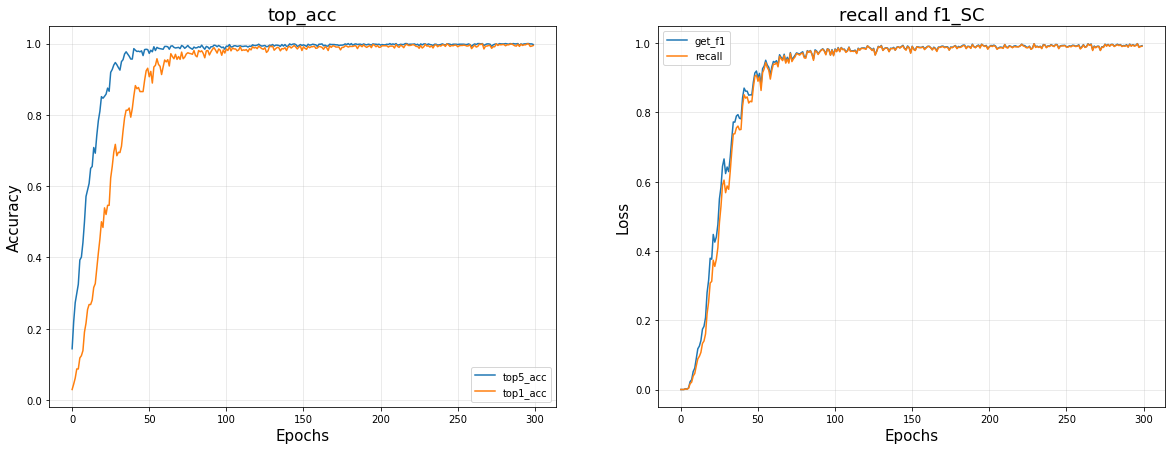

In [52]:
f = plt.figure(figsize=(20,7))

#Adding Subplot 1 (For Accuracy)
f.add_subplot(121)
Title_plt_f1='get_f1'
Title_plt_recall='recall'
Title_plt_acc5='top5_acc'
Title_plt_acc1='top1_acc'

plt.plot(his.epoch,his.history['top_5_categorical_accuracy'],label = "top5_acc") # Accuracy curve for training set
plt.plot(his.epoch,his.history['top_1_categorical_accuracy'],label = "top1_acc") # Accuracy curve for validation set

plt.title("top_acc",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

f.add_subplot(122)

plt.plot(his.epoch,his.history['get_f1'],label="get_f1") # Loss curve for training set
plt.plot(his.epoch,his.history['recall'],label="recall") # Loss curve for validation set

plt.title("recall and f1_SC",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()



# plt.savefig(Save_file_dataside+"chart.png")
plt.show()


In [ ]:
# f = plt.figure(figsize=(20,7))

# #Adding Subplot 1 (For Accuracy)
# f.add_subplot(121)
# Title_plt_acc='_accuracy'
# Title_plt_loss='_Loss'

# plt.plot(his.epoch,his.history['accuracy'],label = Title_plt_acc) # Accuracy curve for training set
# plt.plot(his.epoch,his.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

# plt.title(Title_plt_acc,fontsize=18)
# plt.xlabel("Epochs",fontsize=15)
# plt.ylabel("Accuracy",fontsize=15)
# plt.grid(alpha=0.3)
# plt.legend()

# f.add_subplot(122)

# plt.plot(his.epoch,his.history['loss'],label="loss") # Loss curve for training set
# plt.plot(his.epoch,his.history['val_loss'],label="val_loss") # Loss curve for validation set

# plt.title(Title_plt_loss,fontsize=18)
# plt.xlabel("Epochs",fontsize=15)
# plt.ylabel("Loss",fontsize=15)
# plt.grid(alpha=0.3)
# plt.legend()


# plt.savefig(Save_file_dataside+"chart.png")
# plt.show()


In [ ]:
plt.plot(his.epoch,his.history['loss'],'.')

In [53]:
score=model.evaluate(X_test,y_test,verbose=0)

In [54]:
score
#     'accuracy',
#     tf.keras.metrics.Precision(name='precision'),
#     tf.keras.metrics.Recall(name='recall'),
#     get_f1,
#     top5_acc,
# #     top3_acc,
#     top1_acc


[0.05298440903425217,
 0.993127167224884,
 0.9965517520904541,
 0.993127167224884,
 0.9952877163887024,
 0.9965635538101196,
 0.993127167224884]

In [ ]:
print("The test accuracy for the model is %f "%(score[1]*100))
print("The test precision for the model is %f "%(score[2]*100))
print("The test recall for the model is %f "%(score[3]*100))
print("The test loss for the model is %f "%(score[0]*100))


test_accuracy=round((score[1]*100),3)

In [ ]:
train_score=model.evaluate(X_train,y_train,verbose=0)
print("The train accuracy for the model is %f "%(train_score[1]*100))
train_accuracy=round((train_score[1]*100),3)

In [ ]:
# evaluation = model.evaluate(X_train, y_train)
# print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

In [ ]:
# y_pred = model.predict_classes(X_test)

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.savefig(Save_file_dataside+"MC.png")

plt.show()

In [ ]:
Y_test=y_1
X_test=X_1

In [ ]:
# Y_pred= model.predict(X_test).astype("int32")
Y_pred = np.argmax(model.predict(X_test), axis=-1)

Y_test=np.argmax(Y_test,axis=1)

In [ ]:
print(len(X_test))
print(Y_pred[1])
print(Y_test[1])

In [ ]:
k1=0
error=0
for i in range(len(X_test)):
    a = Y_test[i] 
    b = Y_pred[i]
    if (a != b):
        error=error+1

rows = error // 10 +1#行
cols = 10#每行裡面有幾個
print("error:"+ str(error))#錯誤共幾個
error=0
f = plt.figure(figsize=(2*cols,2*rows))#設定圖跟圖之間的寬度

for i in range(len(X_test)):
    if Y_test[i]!=Y_pred[i]:
        error = error + 1
        f.add_subplot(rows, cols, error)#行與幾個 建立窗格
        plt.imshow(X_test[i])
        plt.axis("off")
        plt.title("ans:"+str(Y_test[i])+" Pred:"+str(Y_pred[i]))

In [ ]:
# model.save('./tmp/SAVE/PLAM_CNN_KM3L_CHAN_FIX_PW1202')  # creates a HDF5 file 'my_model.h5'
model.save(save_model_path+'/h5/model_K_M3_L_CHAN_FIX_PW.h5')
model.save(save_model_path+'/model/model_K_M3_L_CHAN_FIX_PW')
model.save_weights(save_model_path+'/model_checkpoint/model_K_M3_L_CHAN_FIX')

# model.save(save_model_path+'/model/model_K_M3_L_CHAN_FIX_PW')
tf.saved_model.save(model, save_model_path+'/model/model_K_M3_L_CHAN_FIX_PWtf')

In [ ]:
labels = [" BMPD (1)",
"BMPD (10)",
" BMPD (11)",
" BMPD (12)",
" BMPD (13)",
" BMPD (14)",
" BMPD (15)",
" BMPD (16)",
" BMPD (17)",
" BMPD (18)",
" BMPD (19)",
" BMPD (2)",
" BMPD (20)",
" BMPD (21)",
" BMPD (22)",
" BMPD (23)",
" BMPD (24)",
" BMPD (25)",
" BMPD (26)",
" BMPD (27)",
" BMPD (28)",
" BMPD (29)",
" BMPD (3)",
" BMPD (30)",
" BMPD (31)",
" BMPD (32)",
" BMPD (33)",
" BMPD (34)",
" BMPD (35)",
" BMPD (36)",
" BMPD (37)",
" BMPD (38)",
" BMPD (39)",
" BMPD (4)",
" BMPD (40)",
" BMPD (41)",
" BMPD (5)",
" BMPD (6)",
" BMPD (7)",
" BMPD (8)",
" BMPD (9)"]


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_model_path+'/model/model_K_M3_L_CHAN_FIX_PWtf')
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('modelplam.tflite')
tflite_model_file.write_bytes(tflite_model)

In [ ]:
# converter = tf.lite.TFLiteConverter.from_saved_model('./tmp/SAVE/PLAM_CNN_KM3L_CHAN_FIX_PW1202')
# tflite_model = converter.convert()
open(save_model_path+'/model/model_K_M3_L_CHAN_FIX_PWtf.tflite','wb').write(tflite_model)


In [ ]:
# import tensorflow as tf
# # Converting a SavedModel to a TensorFlow Lite model.
# converter = tf.lite.TFLiteConverter.from_saved_model('./app')
# tflite_model = converter.convert()

# Converting a tf.Keras model to a TensorFlow Lite model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Converting ConcreteFunctions to a TensorFlow Lite model.
# converter = tf.lite.TFLiteConverter.from_concrete_functions([func])
# tflite_model = converter.convert()

In [ ]:
# import tensorflow as tf
# # Converting a SavedModel to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_saved_model('./tmp/SAVE/PLAM_CNN_KM3L_CHAN_FIX_PW/')
tflite_model = converter.convert()

# Converting a tf.Keras model to a TensorFlow Lite model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Converting ConcreteFunctions to a TensorFlow Lite model.
# converter = tf.lite.TFLiteConverter.from_concrete_functions([func])
# tflite_model = converter.convert()

In [ ]:
# Save the model.
with open('./tmp/SAVE/model1.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader
# Load input data specific to an on-device ML app.
data = DataLoader.from_folder('./PLAM_FIX/')
# train_data, test_data = data.split(0.3)

# Customize the TensorFlow model.
# model = image_classifier.create(train_data)

# Evaluate the model.
# loss, accuracy = model.evaluate(X_test,y_test)

# Export to Tensorflow Lite model and label file in `export_dir`.
# model.export(export_dir='/tmp/')
# model.export(export_dir='./tmp/', with_metadata=False)

In [ ]:
data

In [ ]:
# model.export(export_dir='./tmp/', with_metadata=True)

In [ ]:
with open('./tmp/SAVE/modellabel.txt', 'w') as f:
  f.write(str(Target))

In [ ]:
# str(data)
data

In [ ]:
df['Labels']

In [ ]:
Target